# Introduction to Linear Regression
Copied and adapted from OpenStats Intro ["Introduction to Linear Regression" lab](http://htmlpreview.github.io/?https://github.com/andrewpbray/oiLabs-base-R/blob/master/simple_regression/simple_regression.html), a product of OpenIntro that is released under a [Creative Commons Attribution-ShareAlike 3.0 Unported](http://creativecommons.org/licenses/by-sa/3.0). Original lab was adapted for OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel from a lab written by the faculty and TAs of UCLA Statistics.

The [data set](https://www.openintro.org/stat/data/?data=mlb11) contains data from 30 Major League Baseball teams in the 2011 season.

## Batter up
The movie [Moneyball](http://en.wikipedia.org/wiki/Moneyball_%28film%29) focuses on the “quest for the secret of success in baseball”. It follows a low-budget team, the Oakland Athletics, who believed that underused statistics, such as a player’s ability to get on base, betterpredict the ability to score runs than typical statistics like home runs, RBIs (runs batted in), and batting average. Obtaining players who excelled in these underused statistics turned out to be much more affordable for the team.

In this lab we’ll be looking at data from all 30 Major League Baseball teams and examining the linear relationship between runs scored in a season and a number of other player statistics. Our aim will be to summarize these relationships both graphically and numerically in order to find which variable, if any, helps us best predict a team’s runs scored in a season.

In [1]:
%matplotlib nbagg
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot 
#import seaborn as sns

from interactiveplot import plot_ss

## The data

In [2]:
# load data into dataframe
mlb11 = pd.read_csv("https://www.openintro.org/stat/data/mlb11.csv")

### Exercise 0
Examine the data frame, checking for number of rows and columns, variable names and types, etc.

In [3]:
mlb11

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766
5,New York Mets,718,5600,1477,108,0.264,1085,130,77,0.335,0.391,0.725
6,New York Yankees,867,5518,1452,222,0.263,1138,147,97,0.343,0.444,0.788
7,Milwaukee Brewers,721,5447,1422,185,0.261,1083,94,96,0.325,0.425,0.750
8,Colorado Rockies,735,5544,1429,163,0.258,1201,118,73,0.329,0.410,0.739
9,Houston Astros,615,5598,1442,95,0.258,1164,118,56,0.311,0.374,0.684


<IPython.core.display.Javascript object>


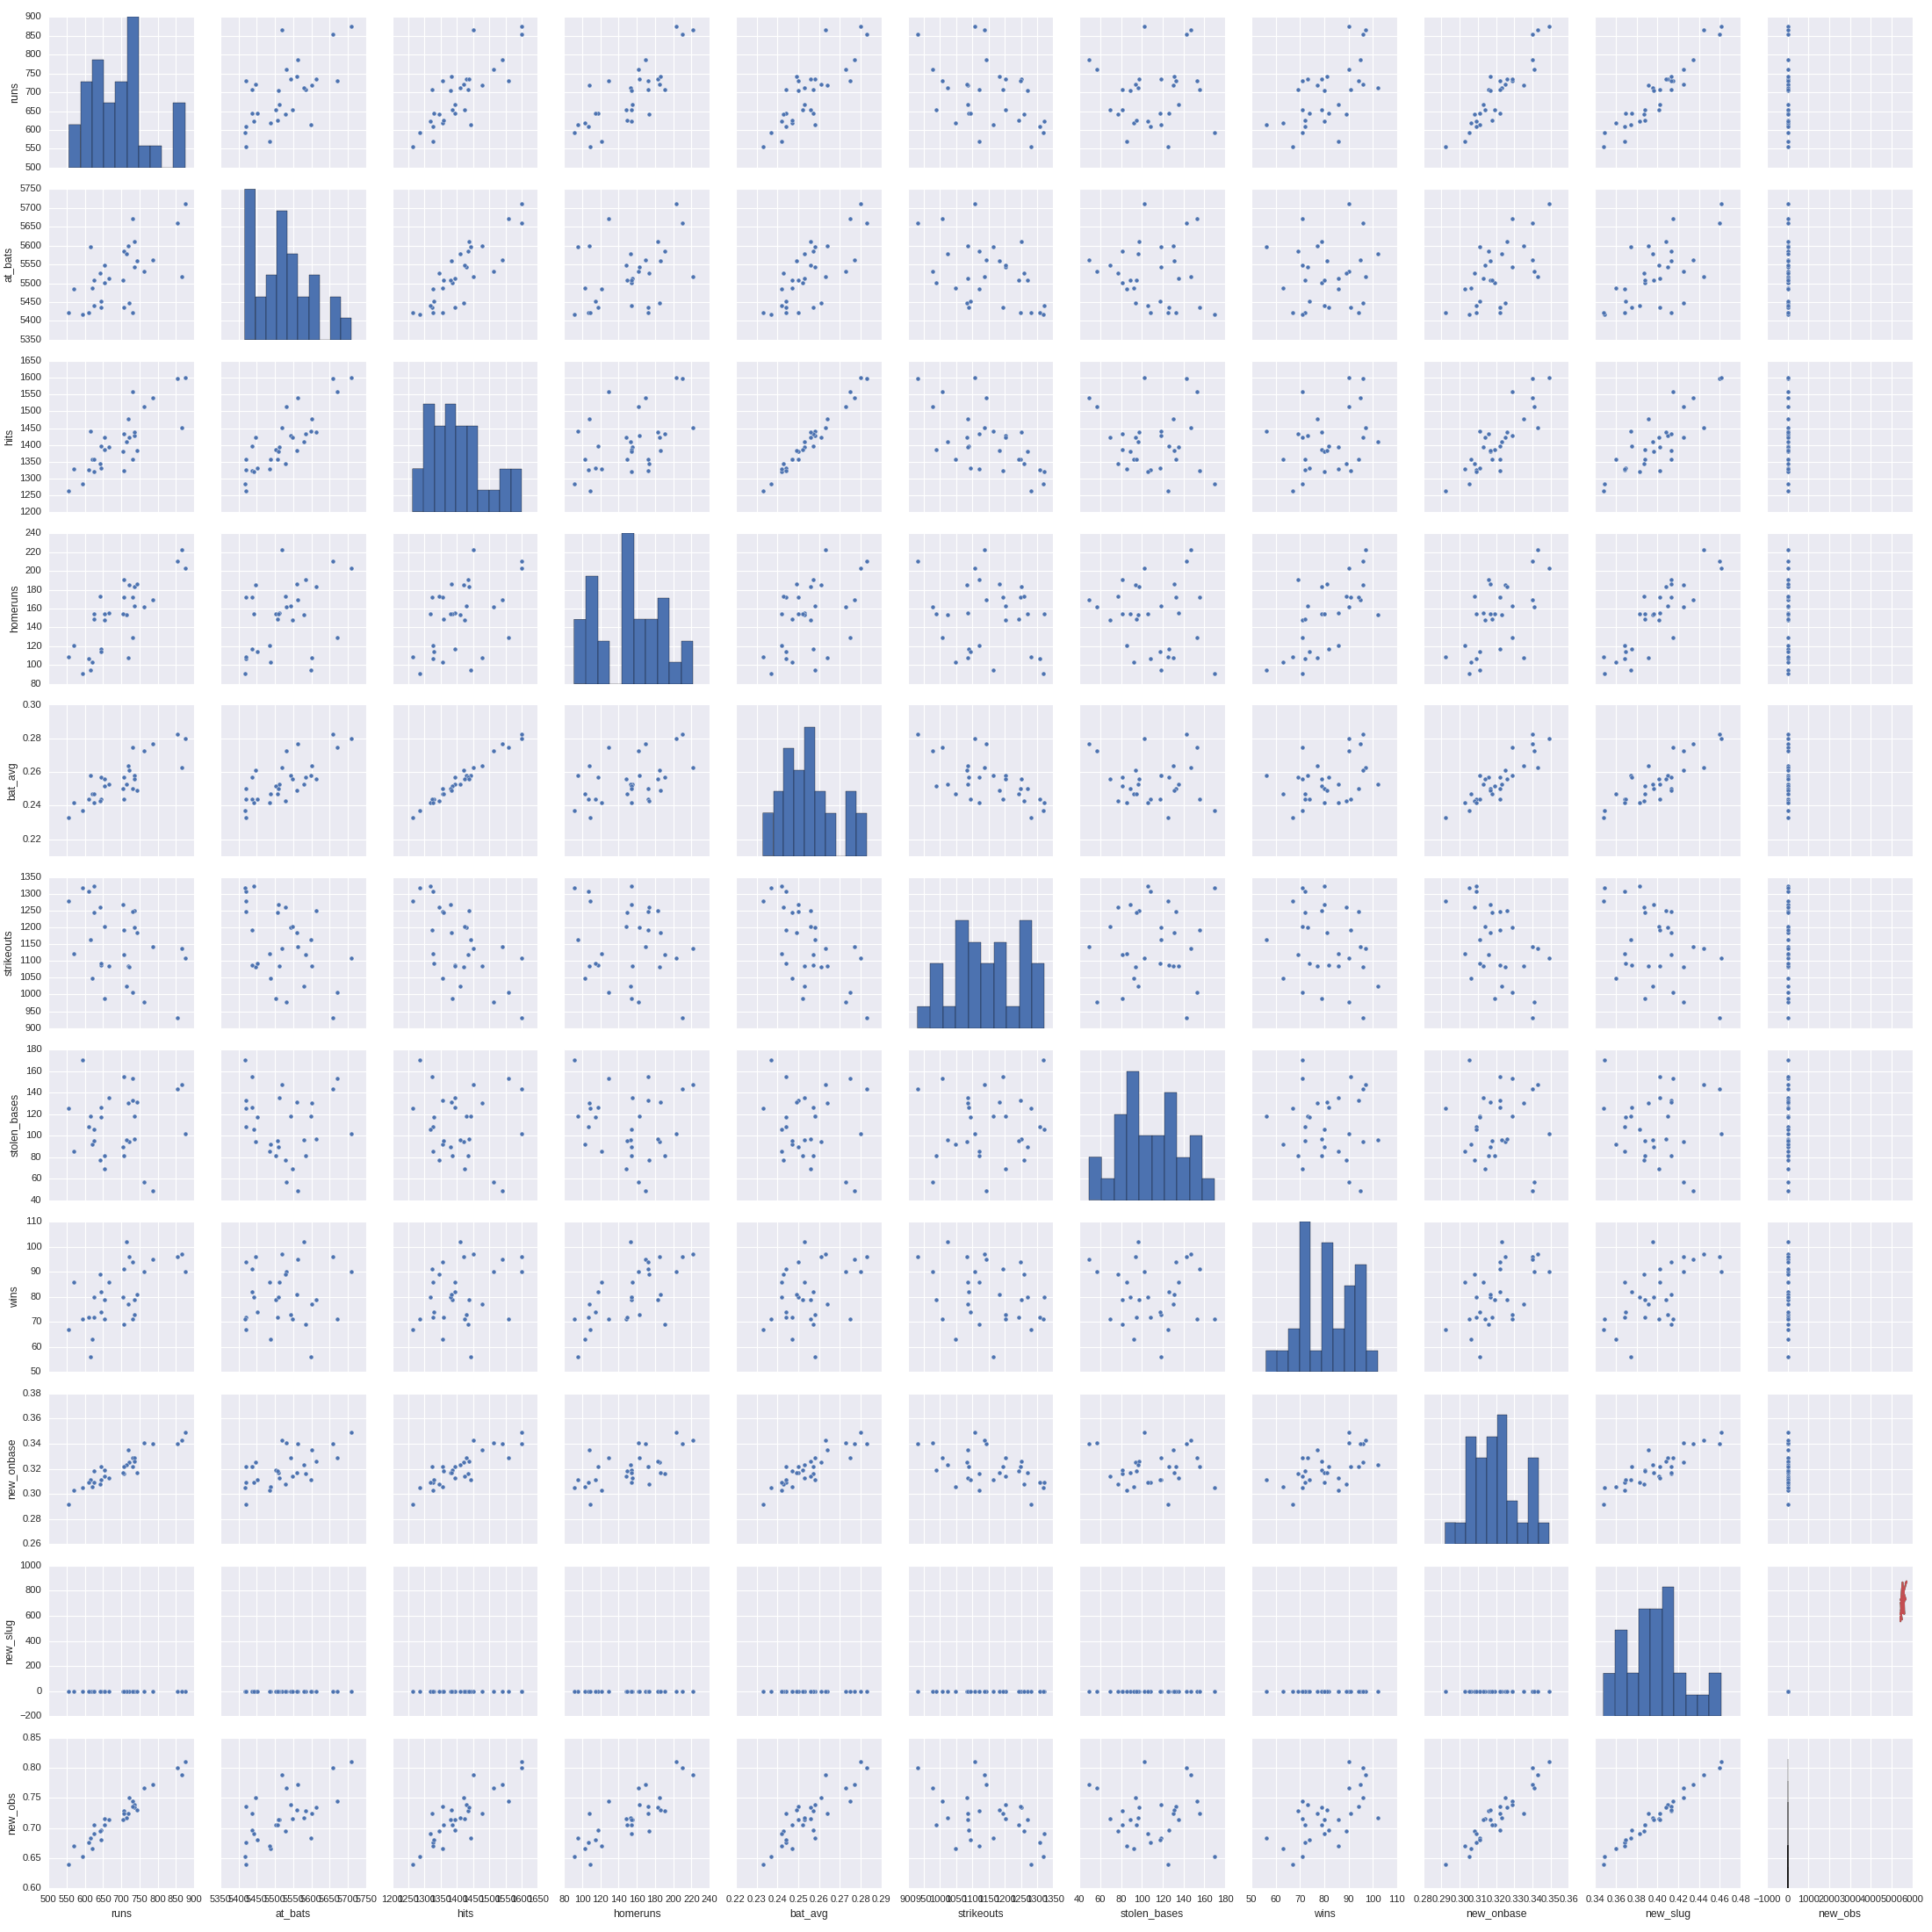

In [18]:
sns.pairplot(mlb11)

In addition to runs scored, there are seven traditionally used variables in the data set: at-bats, hits, home runs, batting average, strikeouts, stolen bases, and wins. There are also three newer variables: on-base percentage, slugging percentage, and on-base plus slugging. For the first portion of the analysis we’ll consider the seven traditional variables. At the end of the lab, you’ll work with the newer variables on your own.

### Exercise 1
What type of plot would you use to display the relationship between `runs` and one of the other numerical variables? Plot this relationship using the variable at_bats as the predictor. Does the relationship look linear? If you knew a team’s `at_bats`, would you be comfortable using a linear model to predict the number of runs?

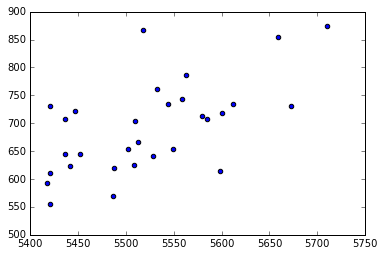

In [4]:
plt.scatter(mlb11.at_bats, mlb11.runs)

_Looks like there is a positive correlation, but a lot of variation, so maybe not very acurate for predicting_

If the relationship looks linear, we can quantify the strength of the relationship with the correlation coefficient.

In [5]:
mlb11.runs.corr(mlb11.at_bats)

0.61062704672066881

## Sum of squared residuals
Think back to the way that we described the distribution of a single variable. Recall that we discussed characteristics such as center, spread, and shape. It’s also useful to be able to describe the relationship of two numerical variables, such as `runs` and `at_bats` above.

### Exercise 2
Looking at your plot from the previous exercise, describe the relationship between these two variables. Make sure to discuss the form, direction, and strength of the relationship as well as any unusual observations.

Just as we used the mean and standard deviation to summarize a single variable, we can summarize the relationship between these two variables by finding the line that best follows their association. Use the following interactive function to select the line that you think does the best job of going through the cloud of points.

After running this command, you’ll be prompted to click two points on the plot to define a line. Once you’ve done that, the line you specified will be shown in black and the residuals in blue. Note that there are 30 residuals, one for each of the 30 observations. Recall that the residuals are the difference between the observed values and the values predicted by the line:

$$ e_i = y_i - \hat{y_i} $$

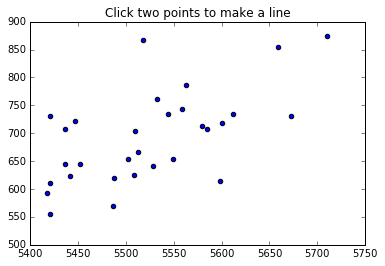

In [6]:
plot_ss(mlb11.at_bats, mlb11.runs)

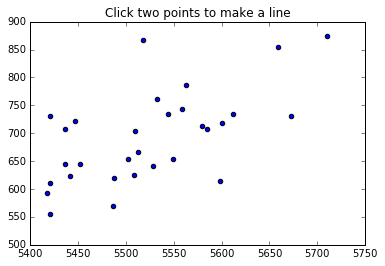

In [7]:
plot_ss(mlb11.at_bats, mlb11.runs)

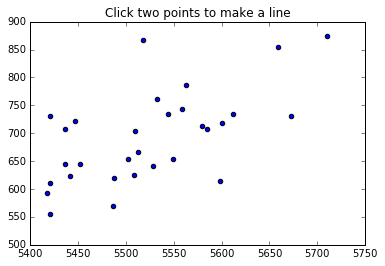

In [8]:
plot_ss(mlb11.at_bats, mlb11.runs)

The most common way to do linear regression is to select the line that minimizes the sum of squared residuals. To visualize the squared residuals, you can rerun the plot command and add the argument `showSquares = True`.

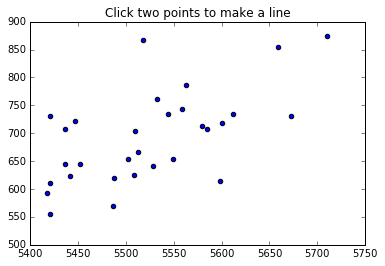

In [9]:
plot_ss(mlb11.at_bats, mlb11.runs, showSquares=True)

Note that the output from the plot_ss function provides you with the slope and intercept of your line as well as the sum of squares.

### Exercise 3
Using `plot_ss`, choose a line that does a good job of minimizing the sum of squares. Run the function several times. What was the smallest sum of squares that you got? How does it compare to your neighbors?

## The linear model
It is rather cumbersome to try to get the correct least squares line, i.e. the line that minimizes the sum of squared residuals, through trial and error. Instead we can use the `sm.OLS` (ordinary least squares) function from statsmodels library to fit the linear model (a.k.a. regression line).

In [10]:
# Fit a linear model using statsmodels (sm) OLS method. 
model = sm.OLS(mlb11.runs, sm.add_constant(mlb11.at_bats))

The function `sm.OLS` takes the parameters (response_variable, explanatory_variable). If the line is not forced to have a zero-intercept, a constant must be added to the explanatory variable data using the function `sm.add_constant`. The statement above fits a linear model of `mlb11.runs` as a function of `mlb11.at_bats`. 

The output of the function is an object of the class OLS. The next cell will create a fit and display the summary.

In [11]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     16.65
Date:                Tue, 01 Nov 2016   Prob (F-statistic):           0.000339
Time:                        20:20:08   Log-Likelihood:                -167.44
No. Observations:                  30   AIC:                             338.9
Df Residuals:                      28   BIC:                             341.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -2789.2429    853.696     -3.267      0.0

Let’s consider the pieces of information in this output important to the task at hand. The first line in the left column shows the name dependent (response) variable, we can verify that this is the model we intended. The table in the middle is key; its first column displays the inear model's y-intercept and the coeffients of `at_bats`. With this table, we can write down the least squares regression line for the linear model:

 $$ \hat{y} = −2789.2429 + 0.6305 ∗ atbats $$

One last piece of information we will discuss from the summary output is the R-squared, or more simply, $R^2$. The $R^2$ value represents the proportion of variability in the response variable that is explained by the explanatory variable. For this model, 37.3% of the variability in runs is explained by at-bats.



### Exercise 4
Fit a new model that uses `homeruns` to predict `runs`. Using the estimates from the output, write the equation of the regression line. What does the slope tell us in the context of the relationship between success of a team and its home runs?

In [70]:
model = sm.OLS(mlb11.runs, sm.add_constant(mlb11.homeruns))
results = model.fit()
print( results.summary() )

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     46.98
Date:                Tue, 01 Nov 2016   Prob (F-statistic):           1.90e-07
Time:                        21:06:06   Log-Likelihood:                -159.66
No. Observations:                  30   AIC:                             323.3
Df Residuals:                      28   BIC:                             326.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        415.2389     41.678      9.963      0.0

_There is a positive relationship between homeruns & runs (more homeruns = more runs!)_

$$ \hat{y} = 415.2389 + (1.8345 * homeruns) $$

## Prediction and prediction errors
Let's create a scatter plot with the least squared line laid on top.

In [18]:
xvals = np.arange(5400, 5750)

In [20]:
yvals = results.predict([(1,x) for x in xvals])

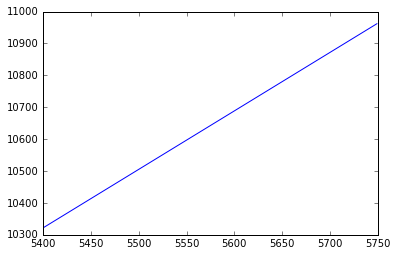

In [25]:
plt.plot(xvals, yvals)

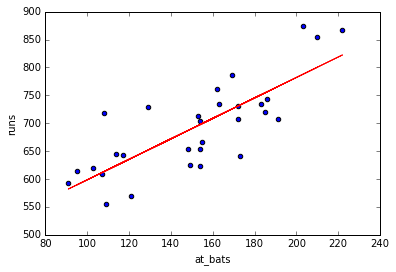

In [71]:
fig = plt.figure()
g = fig.add_subplot(111)
g.plot(mlb11.homeruns, results.fittedvalues, 'r')
g.scatter(mlb11.homeruns, mlb11.runs)
g.set_xlabel("at_bats")
g.set_ylabel("runs")

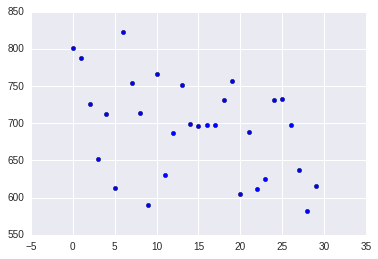

In [62]:
plt.scatter(results.fittedvalues.index, results.fittedvalues)

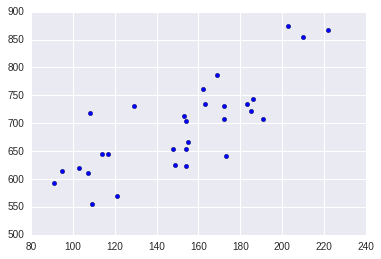

In [56]:
plt.scatter(mlb11.homeruns, mlb11.runs)

The model results object `results` has an attribute `fittedvalues` that is a pandas Series instance with values $\hat{y}$ for each value of the explanatory variable used to train the model. The line these values describe can be used to predict $y$ at any value of $x$. When predictions are made for values of $x$ that are beyond the range of the observed data, it is referred to as extrapolation and is not usually recommended. However, predictions made within the range of the data are more reliable. They’re also used to compute the residuals.

### Exercise 5
If a team manager saw the least squares regression line and not the actual data, how many runs would he or she predict for a team with 5,578 at-bats? Is this an overestimate or an underestimate, and by how much? In other words, what is the residual for this prediction?

In [86]:
-2789.2429 + (0.6305 * 5578)

727.6860999999994

In [26]:
model = sm.OLS(mlb11.runs, sm.add_constant(mlb11.at_bats))
results = model.fit()
print( results.summary() )

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     16.65
Date:                Tue, 01 Nov 2016   Prob (F-statistic):           0.000339
Time:                        20:25:32   Log-Likelihood:                -167.44
No. Observations:                  30   AIC:                             338.9
Df Residuals:                      28   BIC:                             341.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -2789.2429    853.696     -3.267      0.0

In [76]:
-2789.2429 + (0.6305 * 5578)

727.6860999999994

In [36]:
results.predict([1,5578])

array([ 727.96497461])

In [85]:
pd.DataFrame([mlb11.at_bats, mlb11.runs]).T.sort('at_bats')

/home/michael/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,at_bats,runs
28,5417,593
29,5421,556
22,5421,610
18,5421,731
24,5436,707
11,5436,644
26,5441,624
7,5447,721
23,5452,645
27,5486,570


## Model diagnostics
To assess whether the linear model is reliable, we need to check for (1) linearity, (2) nearly normal residuals, and (3) constant variability.

*Linearity*: You already checked if the relationship between runs and at-bats is linear using a scatterplot. We should also verify this condition with a plot of the residuals vs. at-bats. 

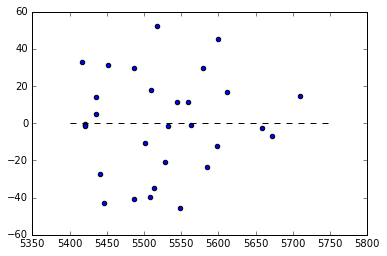

In [51]:
fig = plt.figure()
g = fig.add_subplot(111)
g.scatter(mlb11.at_bats, results.resid)
# add a horizontal dashed line at y=0
g.hlines(0, *g.get_xlim(), linestyles="--")

### Exercise 6
Is there any apparent pattern in the residuals plot? What does this indicate about the linearity of the relationship between runs and at-bats?

*Nearly normal residuals*: To check this condition, we can look at a histogram...

(array([  1.,   7.,  10.,   4.,   6.,   1.,   1.]),
 array([-150, -100,  -50,    0,   50,  100,  150,  200]),
 <a list of 7 Patch objects>)

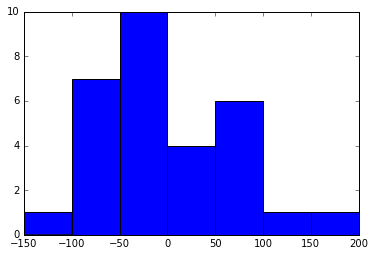

In [31]:
fig = plt.figure()
g = fig.add_subplot(111)
g.hist(results.resid, bins = np.arange(-150, 225, 50))

...or a normal probability plot of the residuals.

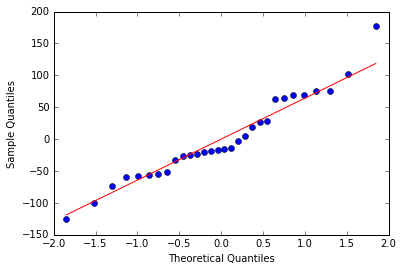

In [32]:
fig = qqplot(results.resid, line='s') #qqplot displays and returns the figure object

### Exercise 7
Based on the histogram and the normal probability plot, does the nearly normal residuals condition appear to be met?

*Constant variability*:

### Exercise 8 
Based on the plot of residuals at the beginning of this section, does the constant variability condition appear to be met?

_yes_

## On Your Own
1) Choose another traditional variable from `mlb11` that you think might be a good predictor of runs. Produce a scatterplot of the two variables and fit a linear model. At a glance, does there seem to be a linear relationship?

2) How does this relationship compare to the relationship between `runs` and `at_bats`? Use the $R^2$ values from the two model summaries to compare. Does your variable seem to predict `runs` better than `at_bats`? How can you tell?

3) Now that you can summarize the linear relationship between two variables, investigate the relationships between runs and each of the other five traditional variables. Which variable best predicts `runs`? Support your conclusion using the graphical and numerical methods we’ve discussed (for the sake of conciseness, only include output for the best variable, not all five).

4) Now examine the three newer variables. These are the statistics used by the author of Moneyball to predict a teams success. In general, are they more or less effective at predicting runs that the old variables? Explain using appropriate graphical and numerical evidence. Of all ten variables we’ve analyzed, which seems to be the best predictor of runs? Using the limited (or not so limited) information you know about these baseball statistics, does your result make sense?

5) Check the model diagnostics for the regression model with the variable you decided was the best predictor for runs.

In [40]:
mlb11.new_slug.corr(mlb11.runs)

0.94703240092915431

In [62]:
model = sm.OLS(mlb11.runs, sm.add_constant(mlb11.new_slug))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     243.5
Date:                Tue, 01 Nov 2016   Prob (F-statistic):           2.42e-15
Time:                        21:03:35   Log-Likelihood:                -140.36
No. Observations:                  30   AIC:                             284.7
Df Residuals:                      28   BIC:                             287.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -375.8041     68.708     -5.470      0.0

((1, 857.60807254454471), (1, 557.29901328041956))

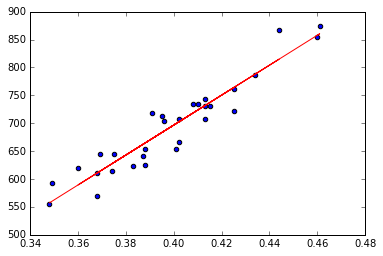

In [63]:
fig = plt.figure()
g = fig.add_subplot(111)
g.plot(mlb11.new_slug, results.fittedvalues, 'r')
g.scatter(mlb11.new_slug, mlb11.runs)

In [72]:
results.

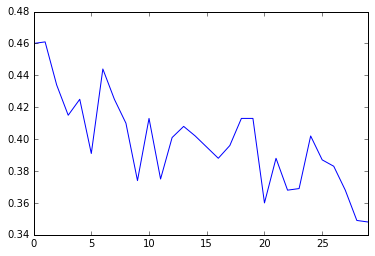

In [38]:
mlb11.new_slug.plot()

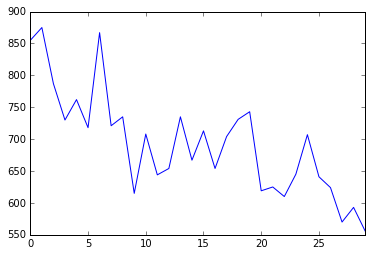

In [39]:
mlb11.runs.plot()